In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop
from matplotlib import pyplot as plt

/home/tony/dnn/anaconda2/envs/myjupyter/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)
(10000, 28, 28)
y_train[0]:5


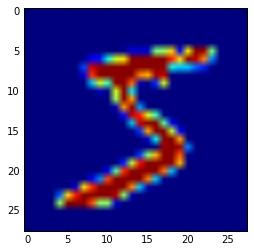

In [3]:
# plotting the first sample
print X_train.shape
print X_test.shape
plt.imshow(X_train[0])
print("y_train[0]:%r" % (y_train[0]))

In [4]:
# data pre-processing
X_train = X_train.reshape(X_train.shape[0], -1) / 255.   # normalize
X_test = X_test.reshape(X_test.shape[0], -1) / 255.      # normalize
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [5]:
if (False):
    # TonyH; 原始版本寫法是 4 layers, 改用以下面 2 layers 寫法
    # Another way to build your neural net
    model = Sequential([
        Dense(32, input_dim=784),
        Activation('relu'),
        Dense(10),
        Activation('softmax'),
    ])
else:
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=784))
    model.add(Dense(10, activation='softmax'))
    
model.summary()
print("Layer len:%d" % (len(model.layers)))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Layer len:2


In [6]:
# Another way to define your optimizer
#rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# We add metrics to get more results you want to see
model.compile(optimizer='rmsprop',  # rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
print('Training ------------')
# Another way to train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Training ------------
Epoch 1/50
60000/60000 [==============================] - 6s 106us/step - loss: 0.1168 - acc: 0.9668
Epoch 2/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.1100 - acc: 0.9696
Epoch 3/50
60000/60000 [==============================] - 6s 102us/step - loss: 0.1046 - acc: 0.9709
Epoch 4/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.0989 - acc: 0.9725
Epoch 5/50
60000/60000 [==============================] - 6s 102us/step - loss: 0.0953 - acc: 0.9736
Epoch 6/50
60000/60000 [==============================] - 7s 109us/step - loss: 0.0914 - acc: 0.9752
Epoch 7/50
60000/60000 [==============================] - 6s 107us/step - loss: 0.0880 - acc: 0.9761
Epoch 8/50
60000/60000 [==============================] - 6s 107us/step - loss: 0.0854 - acc: 0.9774
Epoch 9/50
60000/60000 [==============================] - 6s 106us/step - loss: 0.0823 - acc: 0.9783
Epoch 10/50
60000/60000 [==============================] - 6s 102us/s

In [8]:
print('Testing ------------')
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test, y_test)

print('test loss: ', loss)
print('test accuracy: ', accuracy)

Testing ------------
10000/10000 [==============================] - 0s 49us/step
('test loss: ', 0.14030729268472641)
('test accuracy: ', 0.9632)
